LOADED
['01/01/2020 07:54:00' 0 0 0.3 2.9]
INSERTED
['01/01/2020 07:54:00' 0 0 0.3 2.9 0 0 0]
UPDATED
['01/01/2020 07:54:00' 0 0 0.3 2.9 1 2020 28440]


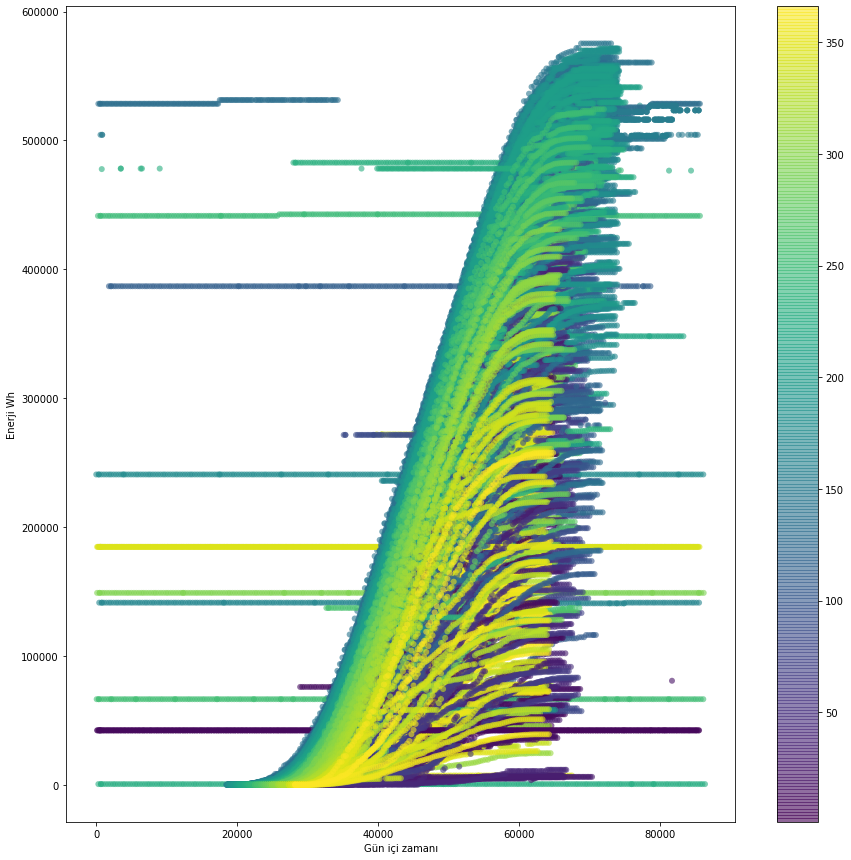

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd


data = pd.read_csv('Calcium_Transformed.csv').values

dateString = data[0,0]
date = datetime.datetime.strptime(dateString, '%d/%m/%Y %H:%M:%S')
dayOfYear = date.timetuple().tm_yday

print("LOADED")
print(data[0])

data = np.insert(data, 5, values=0, axis=1)
data = np.insert(data, 6, values=0, axis=1)
data = np.insert(data, 7, values=0, axis=1)
print("INSERTED")
print(data[0])

for i in range(data.shape[0]):
    dateString = data[i,0]
    date = datetime.datetime.strptime(dateString, '%m/%d/%Y %H:%M:%S')
    dayOfYear = date.timetuple().tm_yday
    year = date.timetuple().tm_year

    #X Axis
    secondOfDay = date.timetuple().tm_hour*3600 + date.timetuple().tm_min*60 + date.timetuple().tm_sec

    data[i,5] = dayOfYear
    data[i,6] = year
    data[i,7] = secondOfDay

print("UPDATED")
print(data[0])

df = data[:,[1, 5, 6, 7]]
df_pd = pd.DataFrame(df)
all_values = df_pd.values

energy = all_values[:,0].astype('float32')
day = all_values[:,1]

second = all_values[:,3]
#ÖZET ÜRETİM GRAFİĞİ
plt.figure(figsize=(15,15))
plt.scatter(second, energy, c=day, alpha=0.6, edgecolors='none')
plt.colorbar()
plt.xlabel('Gün içi zamanı')
plt.ylabel('Enerji Wh')
plt.show()

In [ ]:
# Test ve Eğitim Adımı
x = all_values[:,1:4].astype('float32')
X_train, X_test, y_train, y_test = train_test_split(x, energy, test_size=0.8, random_state=42, shuffle=True)

#Model Tanımı
model = Sequential()
model.add(Dense( 512,input_dim=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(1,activation='relu'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

# Training Adımı
model.fit(X_train, y_train, epochs=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               2048      
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

4/4 [==============================] - 0s 4ms/step


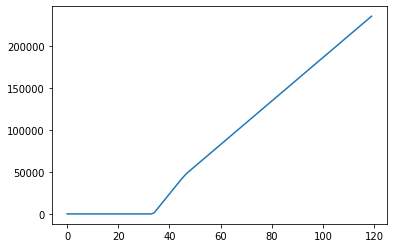

[234982.56]


In [ ]:
#Tahmin Adımı

prediction_day = []
startSecond = 8 * 60 * 60; #Saat 6 başlangıç
for interval in range(120):
  prediction_day.append([9, 2022, startSecond])
  startSecond += 300
predictions = model.predict(prediction_day)
plt.plot(predictions)
plt.show()
print(predictions[119])